In [1]:
import networkx as nx
import osmnx as ox
from matplotlib import pyplot as plt

import bachelors_thesis.util as util

In [2]:
data_path = "../../data"

In [3]:
## Fetch OSMnx graph
road_graph_ox = ox.graph_from_bbox(bbox=(113.95088, 22.57502, 114.08323, 22.71175), network_type="drive",
                                   simplify=False)
print("Road Graph OSMnx:")
print(road_graph_ox)

road_graph_ox = ox.add_edge_speeds(road_graph_ox)
road_graph_ox = ox.add_edge_travel_times(road_graph_ox)

# Remove self-loops
road_graph_ox.remove_edges_from(nx.selfloop_edges(road_graph_ox))

# Save OSMnx road graph
util.save_graph(road_graph_ox, f"{data_path}/road_graph/road_graph_ox_nsl.pickle")
# road_graph_ox = util.load_graph(f"{data_path}/road_graph/road_graph_ox_nsl.pickle")
print("Road Graph OSMnx (nsl):")
print(road_graph_ox)

road_graph_ox = ox.project_graph(road_graph_ox, to_crs=util.EPSG_32650)
tolerance = 35
road_graph_ox = ox.simplify_graph(road_graph_ox, track_merged=True)
# road_graph_ox = ox.consolidate_intersections(road_graph_ox, tolerance=tolerance, rebuild_graph=True, dead_ends=True,
#                                              reconnect_edges=True)
road_graph_ox = ox.project_graph(road_graph_ox, to_crs=util.EPSG_4326)

util.save_graph(road_graph_ox, f"{data_path}/road_graph/road_graph_ox_sim_con_{tolerance}_nsl.pickle")
print("Road Graph OSMnx (nsl, sim, con):")
print(road_graph_ox)

sccs = nx.strongly_connected_components(road_graph_ox)
max_scc = max(sccs, key=len)
max_scc_sub_road_graph = road_graph_ox.subgraph(max_scc).copy()
print("Road Graph OSMnx (nsl, sim, con, sc):")
print(max_scc_sub_road_graph)

util.save_graph(max_scc_sub_road_graph, f"{data_path}/road_graph/road_graph_ox_sim_con_{tolerance}_nsl_sc.pickle")

Road Graph OSMnx:
MultiDiGraph with 41456 nodes and 58920 edges
Road Graph OSMnx (nsl):
MultiDiGraph with 41456 nodes and 58920 edges
Road Graph OSMnx (nsl, sim, con):
MultiDiGraph with 6254 nodes and 12448 edges
Road Graph OSMnx (nsl, sim, con, sc):
MultiDiGraph with 6003 nodes and 12063 edges


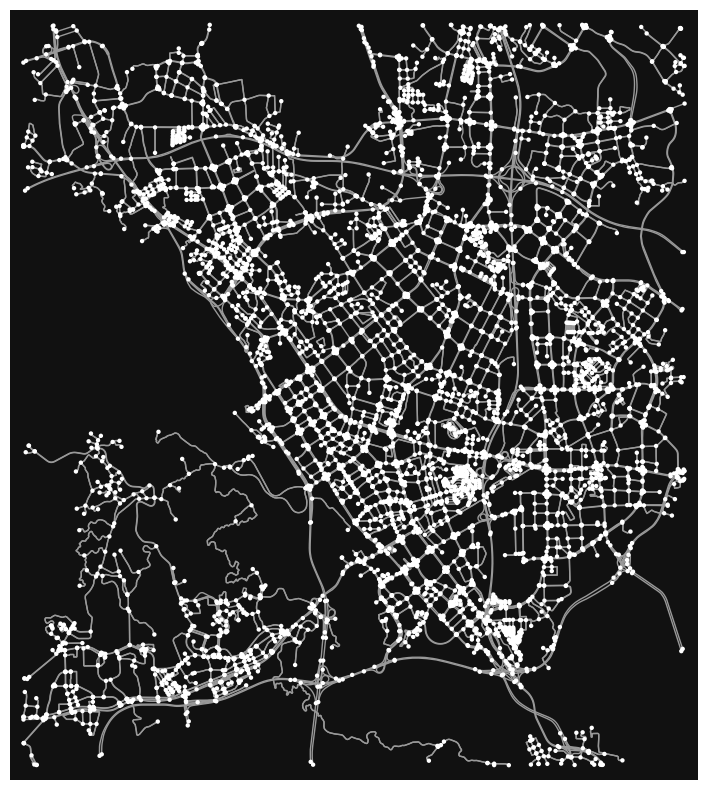

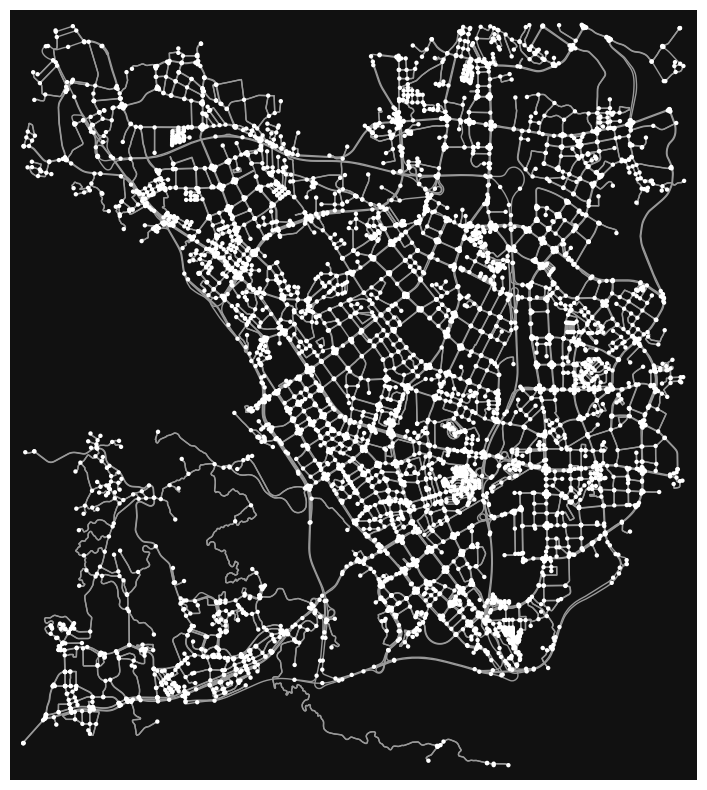

In [4]:
## Draw the road graph
pos = {node: (.nodes[node]["x"], .nodes[node]["y"]) for node in .nodes()}

fig, ax = ox.plot_graph(
    road_graph_ox,
    node_size=10,
    figsize=(10, 10)
)
ax.set_title("Road Graph OSMnx (nsl, sim, con)")

fig, ax = ox.plot_graph(
    max_scc_sub_road_graph,
    node_size=10,
    figsize=(10, 10)
)
ax.set_title("Road Graph OSMnx (nsl, sim, con, sc)")

plt.show()